# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [4]:
data = pd.DataFrame({'x': x, 'y': y, 'z':z})
data

,x,y,z
0,0,0,0
1,1,2,1
2,2,4,4
3,3,6,9
4,4,8,16
...,...,...,...
95,95,190,9025
96,96,192,9216
97,97,194,9409
98,98,196,9604


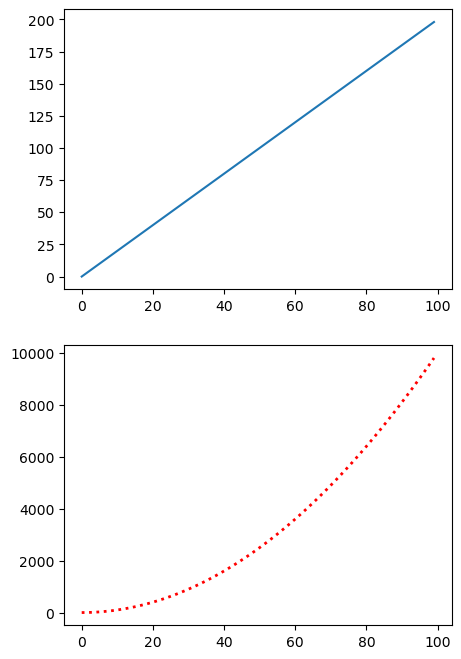

In [5]:
# Method 1
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,8),linewidth=9)
axs[0].plot(x, y,linewidth=1.5)
axs[1].plot(x, z,color='red', marker='', linestyle=':',
     linewidth=2, markersize=1)


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

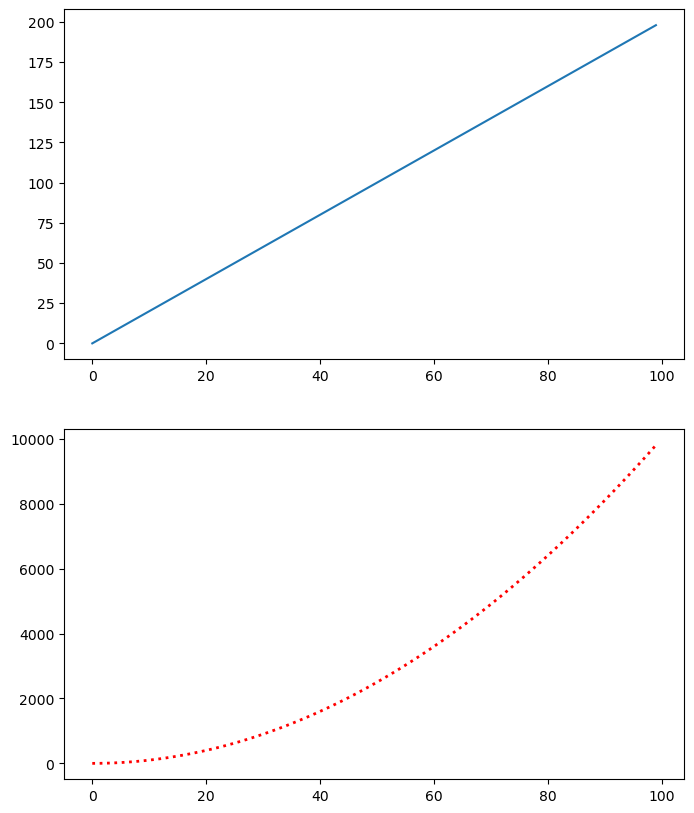

In [6]:
# Method 2
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10),linewidth=9)
axs[0].plot(x, y,linewidth=1.5)
axs[1].plot(x, z,color='red', marker='', linestyle=':',
     linewidth=2, markersize=1)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'Y')

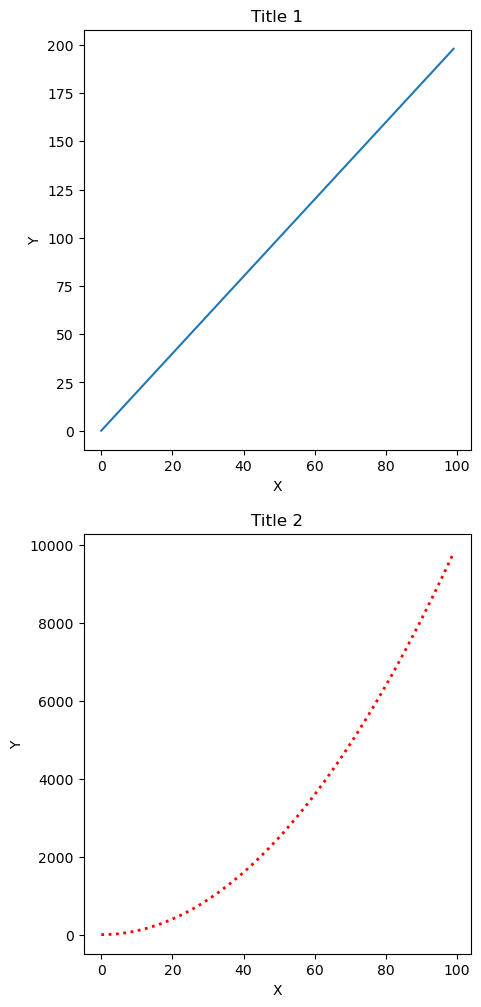

In [7]:
# your code here
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,12),linewidth=9)
axs[0].plot(x, y,linewidth=1.5)
axs[0].set_title('Title 1')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].plot(x, z,color='red', marker='', linestyle=':',
     linewidth=2, markersize=1)
axs[1].set_title('Title 2')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [8]:
# your code here
y1 = np.e ** x
data['y1'] = y1
data

,x,y,z,y1
0,0,0,0,1.000000e+00
1,1,2,1,2.718282e+00
2,2,4,4,7.389056e+00
3,3,6,9,2.008554e+01
4,4,8,16,5.459815e+01
...,...,...,...,...
95,95,190,9025,1.811239e+41
96,96,192,9216,4.923458e+41
97,97,194,9409,1.338335e+42
98,98,196,9604,3.637971e+42


'El resultado parece que me da bien, pero me surge una duda:\nHe ido probando de diferentes maneras y no soy capaz de hacer que los dos plots sean logarítmicos\no al menos que solo el primero lo sea.'

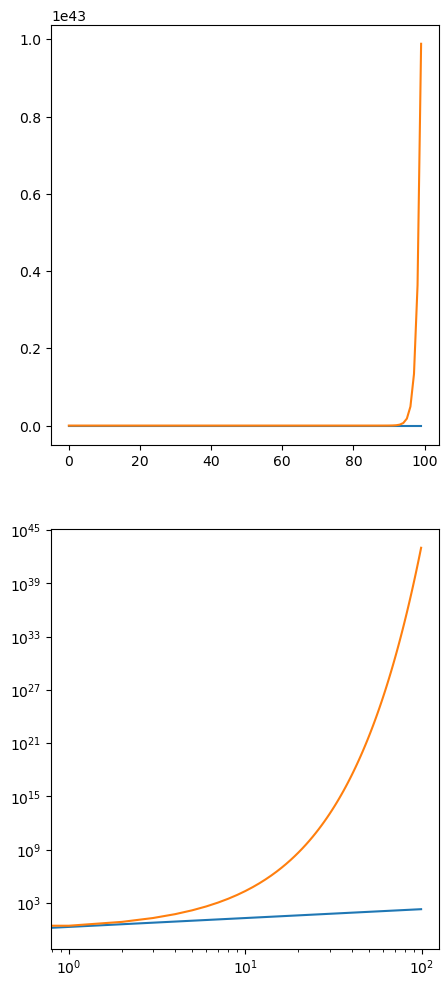

In [9]:
# your code here
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,12),linewidth=9)
axs[0].plot(x, y, x, y1, linewidth=1.5)
axs[1].plot(x, y, x, y1)
plt.yscale("log")
plt.xscale("log")

'''El resultado parece que me da bien, pero me surge una duda:
He ido probando de diferentes maneras y no soy capaz de hacer que los dos plots sean logarítmicos
o al menos que solo el primero lo sea.'''

#### As a bonus challenge, try to add a legend to the plot.

In [38]:
# your code here
# Lo divido en dos para poder distinguir las labels
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 12), linewidth=9)
axs[0].plot(x, y, label='Y', linewidth=1.5)
axs[0].plot(x, y1, label='Y1', linewidth=1.5)
axs[1].plot(x, y, label='Y')
axs[1].plot(x, y1, label='Y1')

plt.yscale("log")
plt.xscale("log")

axs[0].legend()
axs[1].legend()



NameError: name 'sca' is not defined

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [67]:
# your code here
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [17]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [36]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
median_month_steps = fitbit.groupby(['Months_encoded'])['Steps'].median()
print(median_month_steps)
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fitbit['Day type'] = fitbit['Days'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday'] else 'weekend')
median_day_steps = fitbit.groupby(['Day type'])['Steps'].median()
print(median_day_steps)

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64
Day type
weekday    10445.5
weekend     9998.0
Name: Steps, dtype: float64


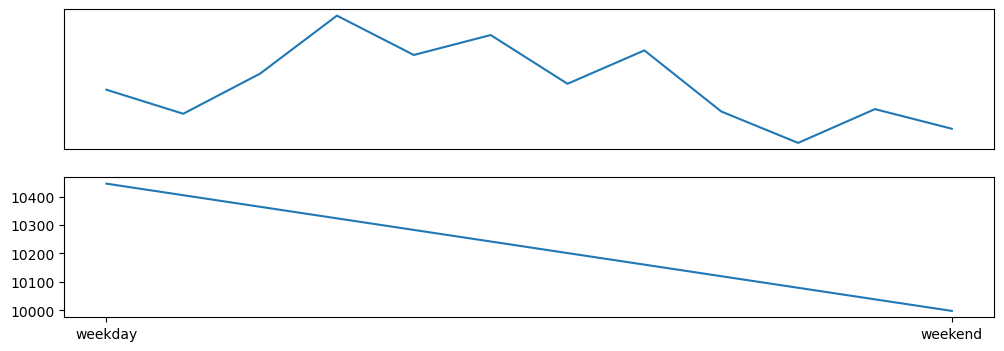

In [66]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,4),linewidth=9)
plt.sca(ax[0])
plt.yticks([])
plt.xticks([]) 
plt.plot(median_month_steps) 
  
plt.sca(ax[1]) 
plt.plot(median_day_steps)

# Aparte de quitar los valores de los ejes, no se que mas puede hacer el xticks/yticks

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

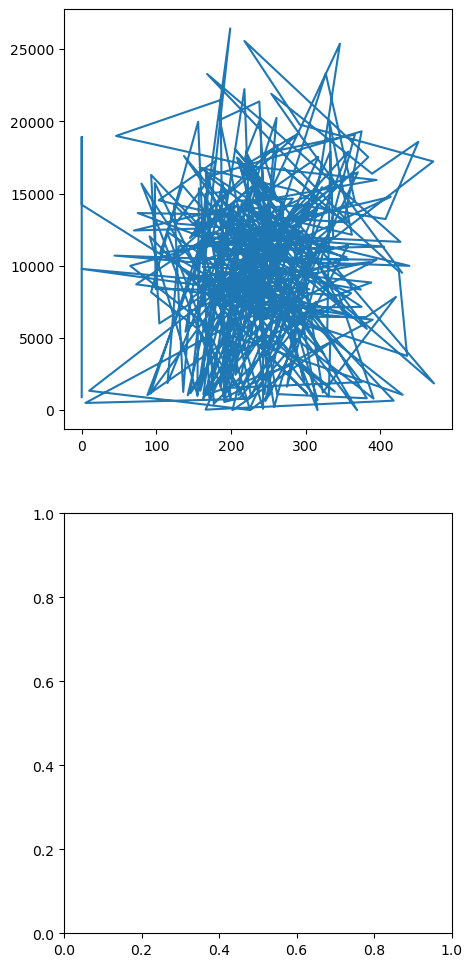

In [76]:

fitbit1 = fitbit.sort_values(by='Steps')

# your code here
#Minutes Lightly Active vs Steps

#Minutes Very Active vs Steps

#Minutes Sedentary vs Steps
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 12), linewidth=9)
plt.sca(axs[0])
plt.plot(fitbit1['Minutes Lightly Active'], fitbit['Steps'])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
# your code here

#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
# your code here

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here

In [ ]:
# CATEGORICAL VARIABLES
# your code here

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here

#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here